In [1]:
%load_ext autoreload

In [2]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
config.test(end_rs=2000, iter=2, std_only=True)
# config.test()

Running main.evolve(...): 
******************************************
Testing solution with no DM: 
****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/26.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


  0%|          | 0/26.0 [00:00<?, ?it/s]

The maximum relative change in xHI and xHeI is:  0.0
The maximum relative change in Tm is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(He ion) is:  0.0
The maximum relative change in f_(Lya) is:  0.0
The maximum relative change in f_(heat) is:  0.0
The maximum relative change in f_(cont) is:  0.0
The maximum relative change in the MLA parameters is:  0.0
Pickled solution with no DM!
Test complete!


In [ ]:
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/std_test_data.p', 'rb'))

ref_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6.p', 'rb'))

In [ ]:
print(test_data['MLA'][1:])
print(ref_data['MLA'][1:])

In [6]:
options_dict = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e25,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'recfast_TLA':True, 'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

options_dict_std = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e40,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'recfast_TLA':True, 'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

In [7]:
# %%prun 
# res = main.evolve(**options_dict)
res_std = main.evolve(**options_dict_std)

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/414.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7318223210112D+01   r2 = -0.4205083171435D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7202063395333D+01   r2 = -0.2506267322938D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.4114047054148D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.9345514766044D-16
 lsoda--  warning..internal t (=r1) 

  0%|          | 0/414.0 [00:00<?, ?it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7318223210112D+01   r2 = -0.4205083173106D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7202063395333D+01   r2 = -0.2506267323537D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.4114047054919D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.9345514767795D-16
 lsoda--  warning..internal t (=r1) 

  0%|          | 0/414.0 [00:00<?, ?it/s]

  0%|          | 0/414.0 [00:00<?, ?it/s]

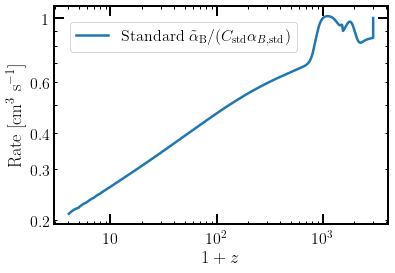

In [9]:
plt.figure()

plt.loglog()

res_rs = res[-1]['MLA'][0]
x_std = phys.x_std(res_rs)
Tm_std = phys.Tm_std(res_rs)

C_times_alpha_B = phys.peebles_C(x_std, res_rs) * phys.alpha_recomb(Tm_std, 'HI')


# plt.plot(res['MLA'][0], res['MLA'][1,:], label=r'DM $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B,\mathrm{std}})$')
plt.plot(res_std[-1]['MLA'][0], res_std[-1]['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std_2['MLA'][0], res_std_2['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std['MLA'][0], res_std['MLA'][1,:] / res_std_2['MLA'][1,:])
# plt.plot(res_rs, C_times_alpha_B, 'k--', label=r'$C_\mathrm{std} \alpha_{B, \mathrm{std}}$')


plt.xlabel(r'$1+z$')
plt.ylabel(r'Rate [cm$^{3}$ s$^{-1}$]')
plt.legend()

# plt.xlim(1e3, 3e3)

In [ ]:
plt.figure()

plt.loglog()

plt.plot(res_std['rs'], res_std['x'][:,0] / phys.x_std(res_std['rs']))

plt.plot(res['rs'], res['x'][:,0] / phys.x_std(res['rs']))


# plt.xlim(20, 3000)
# plt.ylim(0.975, 1.025)

In [10]:
pickle.dump(res_std, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6_iter_2.p', 'wb'))

pickle.dump(res, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6_iter_2.p', 'wb'))
